In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import metrics
from random import randint
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import MNIST

In [2]:
x_train_lgr = MNIST.x_train
y_train_lgr = MNIST.y_train
x_test_lgr = MNIST.x_test
y_test_lgr = MNIST.y_test

In [3]:
clf_lgr = LogisticRegression()

In [4]:
clf_lgr.fit(x_train_lgr, y_train_lgr)

c:\users\aguer\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [5]:
predicted_lgr = clf_lgr.predict(x_test_lgr)
expected_lgr = y_test_lgr

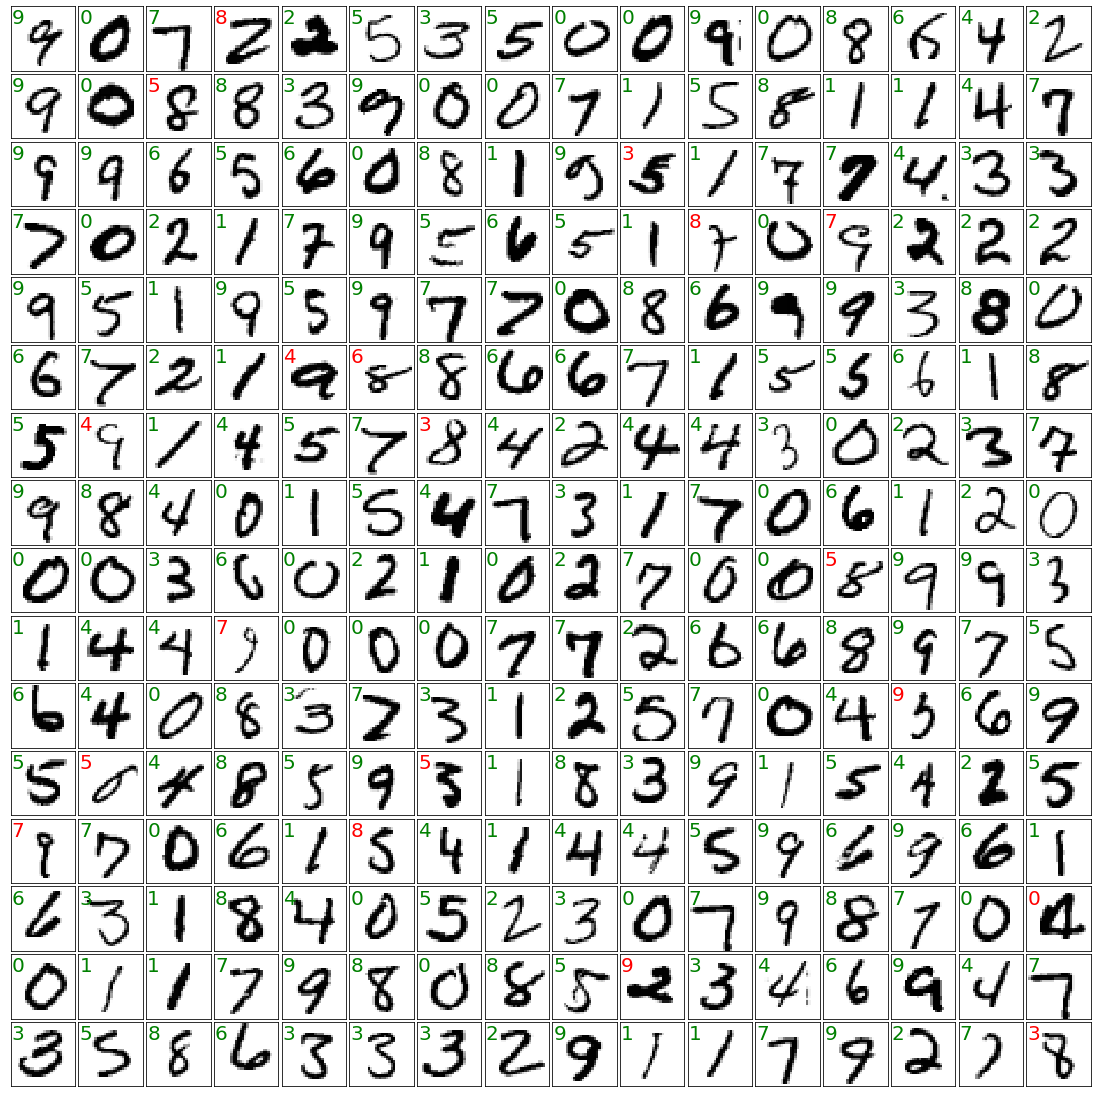

In [6]:
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for j in range(256):
    i = randint(0, len(predicted_lgr) - 1)
    ax = fig.add_subplot(16, 16, j + 1, xticks=[], yticks=[])
    ax.imshow(x_test_lgr.reshape(-1, 28, 28)[i], cmap=plt.cm.binary,
              interpolation='nearest')
    if predicted_lgr[i] == expected_lgr[i]:
        ax.text(0, 7, str(predicted_lgr[i]), fontsize=20, color='green')
    else:
        ax.text(0, 7, str(predicted_lgr[i]), fontsize=20, color='red')

In [7]:
print(metrics.classification_report(expected_lgr, predicted_lgr))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.93      0.93      0.93       982
           5       0.90      0.87      0.89       892
           6       0.94      0.95      0.95       958
           7       0.93      0.93      0.93      1028
           8       0.87      0.89      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



In [8]:
d_lgr = [array for array in metrics.confusion_matrix(expected_lgr, predicted_lgr)]
data_matrix_lgr = {"0": d_lgr[0], "1": d_lgr[1], "2": d_lgr[2], "3": d_lgr[3], "4": d_lgr[4], \
                   "5": d_lgr[5], "6": d_lgr[6], "7": d_lgr[7], "8": d_lgr[8], "9": d_lgr[9]}
df_matrix_lgr = pd.DataFrame(data=data_matrix_lgr)
df_matrix_lgr

,0,1,2,3,4,5,6,7,8,9
0,963,0,3,4,1,11,9,1,8,9
1,0,1112,10,1,1,2,3,6,7,7
2,0,4,926,21,7,1,7,24,6,0
3,3,2,15,916,3,33,3,5,23,11
4,1,0,6,1,910,11,7,7,6,25
5,3,1,4,26,0,776,16,1,26,6
6,4,3,15,3,9,11,910,0,10,0
7,4,2,8,9,7,6,2,951,10,22
8,2,11,42,22,10,35,1,3,869,7
9,0,0,3,7,34,6,0,30,9,922
